# Notebook for making movies of FlyOver trials

In [ ]:
__author__ = 'Hannah Haberkern, hjmhaberkern@gmail.com'

import numpy as np
import pandas as pd 
    
from os import mkdir, walk, getcwd
from os.path import sep, exists
from sys import path, exit
from glob import glob

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import gridspec
import seaborn as sns

from Tkinter import Tk
from tkFileDialog import askdirectory, askopenfilename

import imageio

# Set path to analysis code directory
codeDir = sep.join(getcwd().split(sep)[:-2])
path.insert(1, codeDir)

from flyVR.flyVRoptogenetics.flyVRoptogenetics_oneTrialBasicAnalysis import singleTwoObjVROptogenTrialAnalysis

from plottingUtilities.basicPlotting import makeNestedPlotDirectory, myAxisTheme,_myAccentList
from plottingUtilities.objectInteractionPlots import plotWalkingVelocityDistr
from plottingUtilities.plotsWithDataframe import oneDimResidencyWithVar_2LM_df

from flyVR.utilities.loadObjectCoords import loadObjectCoordIdentities

from trajectoryAnalysis.trajectoryDerivedParams import relationToObject
from trajectoryAnalysis.circularStatsOnTrajectories import circmeanvec

from plottingUtilities.objectPreferencePlots import countvisits, diffCorrPlot, prettyBoxPlot, simpleBoxPlot

%matplotlib inline 

# Choose files to analyse ..............................................................................................

baseDir = '/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/twoObjOpto'

root = Tk()
# prevents root window from appearing
root.withdraw()
# choose experiment folder
dataDir = askdirectory(initialdir=baseDir,
                       title='Select experiment directory (containing directories for multiple flies)') + sep
root.update()
root.destroy()
expDirs = sorted(walk(dataDir).next()[1])

analysisDir = sep.join(dataDir.split(sep)[:-2]) + sep + 'analysis' + sep

try:
    expDirs.remove('virtualWorld')
except:
    print('You selected an invalid data directory.\n' +
          'Expected folder structure of the selected path is some/path/to/experimentName/flyGender/rawData/')
    exit(1)

print('\n Analysing the following folders:\n')
print(expDirs)

In [2]:
expDir = dataDir + expDirs[0] + sep
print(expDir)
FODataFiles = [filepath.split(sep)[-1] for filepath in glob(expDir + '*.txt')]
FODataFiles

/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/twoObjOpto/HC_x_10xChrimsonR/baseline10/antiCyli/male/rawData/m01/


['twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_8d_5h_10xChrR-HC-Ret_10bl_m01_pre_out_161126164545.txt',
 'twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_8d_5h_10xChrR-HC-Ret_10bl_m01_train_out_161126165636.txt',
 'twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_8d_5h_10xChrR-HC-Ret_10bl_m01_post_out_161126171710.txt']

In [3]:
keylist = ['headingAngle','rotVelo','time','transVelo',
           'xPos','xPosInMiniarena','yPos','yPosInMiniarena','rEvents']

keylistLong = ['flyID','trial','trialtype','reinforcement','starvation','moving'] + keylist
FOAllFlies_df = pd.DataFrame(data=np.zeros((0,len(keylistLong))), columns=keylistLong)
 
vTransTH = 2 #mm/s

# Go through directories of experiments with different flies ...............................................
for currExpDir in expDirs:

    expDir = dataDir + currExpDir + sep
    print('\n Analysing the following folder:\n')
    print(expDir)

    FODataFiles = [filepath.split(sep)[-1] for filepath in glob(expDir + '*.txt')]
    FODataFiles = sorted(FODataFiles)

    print('\n Analysing the following log files:\n')
    print(FODataFiles)

    # Run single trial analysis on each file in folder .....................................................
    for fileToAnalyse in FODataFiles:
        
        flyID = fileToAnalyse.split('_')[6]
        genotype = fileToAnalyse.split('_')[5]
        trial = FODataFiles.index(fileToAnalyse) + 1
        
        print('Loading saved *.npy file.')
        FODatLoad = np.load(expDir + fileToAnalyse[:-3] + 'npy')[()]

        # Split into visible object trials and invisible object trials
        if 'train' in fileToAnalyse:
            trialtype = 'train'
            rZones = 'on'
        elif 'pre' in fileToAnalyse:
            trialtype = 'pre'
            rZones = 'off'
        else:
            trialtype = 'post'
            rZones = 'off'
        
        vTrans = np.copy(FODatLoad['transVelo'])
        moving = vTrans >= vTransTH

        FODatLoad_df = pd.DataFrame.from_dict(FODatLoad,orient='columns')
        FODatLoad_df.insert(0, 'flyID', flyID)
        FODatLoad_df.insert(1, 'trial', trial)
        FODatLoad_df.insert(2, 'trialtype', trialtype)
        FODatLoad_df.insert(3, 'reinforcement', rZones)
        FODatLoad_df.insert(5, 'moving', moving)
        
        FOAllFlies_df = FOAllFlies_df.append(FODatLoad_df)



 Analysing the following folder:

/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/twoObjOpto/HC_x_10xChrimsonR/baseline10/antiCyli/male/rawData/m01/

 Analysing the following log files:

['twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_8d_5h_10xChrR-HC-Ret_10bl_m01_post_out_161126171710.txt', 'twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_8d_5h_10xChrR-HC-Ret_10bl_m01_pre_out_161126164545.txt', 'twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_8d_5h_10xChrR-HC-Ret_10bl_m01_train_out_161126165636.txt']
Loading saved *.npy file.
Loading saved *.npy file.
Loading saved *.npy file.

 Analysing the following folder:

/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/twoObjOpto/HC_x_10xChrimsonR/baseline10/antiCyli/male/rawData/m02/

 Analysing the following log files:

['twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_8d_6h_10xChrR-HC-Ret_10bl_m02_post_out_161126181113.txt', 'twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_8d_6h_10xChrR-HC-Ret_10bl_m

Loading saved *.npy file.
Loading saved *.npy file.

 Analysing the following folder:

/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/twoObjOpto/HC_x_10xChrimsonR/baseline10/antiCyli/male/rawData/m15/

 Analysing the following log files:

['twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_9d_10h_10xChrR-HC-Ret_10bl_m15_post_out_161209212359.txt', 'twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_9d_10h_10xChrR-HC-Ret_10bl_m15_pre_out_161209205248.txt', 'twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_9d_10h_10xChrR-HC-Ret_10bl_m15_train_out_161209210316.txt']
Loading saved *.npy file.
Loading saved *.npy file.
Loading saved *.npy file.

 Analysing the following folder:

/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/twoObjOpto/HC_x_10xChrimsonR/baseline10/antiCyli/male/rawData/m16/

 Analysing the following log files:

['twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_6-8d_7h_10xChrR-HC-Ret_10bl_m16_post_out_170131223624.txt', 'twoObjectForest_1cm4cm

In [4]:
FOAllFlies_df = FOAllFlies_df[keylistLong]

FOAllFlies_df['flyID'] = FOAllFlies_df['flyID'].astype('category')
FOAllFlies_df['trial'] = FOAllFlies_df['trial'].astype('category')
FOAllFlies_df['trialtype'] = FOAllFlies_df['trialtype'].astype('category')
FOAllFlies_df['reinforcement'] = FOAllFlies_df['reinforcement'].astype('category')

FOAllFlies_df 

,flyID,trial,trialtype,reinforcement,starvation,moving,headingAngle,rotVelo,time,transVelo,xPos,xPosInMiniarena,yPos,yPosInMiniarena,rEvents
0,10xChrR-HC-Ret,1.0,post,off,NaN,0.0,-0.000004,0.000000,0.000000,0.000000,60.622000,60.622000,35.000000,35.000000,10.0
1,10xChrR-HC-Ret,1.0,post,off,NaN,0.0,-0.000004,0.235672,0.050005,0.793497,60.622000,60.622000,35.000000,35.000000,10.0
2,10xChrR-HC-Ret,1.0,post,off,NaN,0.0,0.011781,0.157064,0.100010,1.588667,60.591600,60.591600,34.974500,34.974500,10.0
3,10xChrR-HC-Ret,1.0,post,off,NaN,1.0,0.019635,-1.570639,0.150015,3.968839,60.531108,60.531108,34.923006,34.923006,10.0
4,10xChrR-HC-Ret,1.0,post,off,NaN,1.0,-0.058905,-3.298343,0.200020,4.234325,60.375600,60.375600,34.799700,34.799700,10.0
5,10xChrR-HC-Ret,1.0,post,off,NaN,1.0,-0.223838,-4.083662,0.250025,4.020724,60.176300,60.176300,34.728200,34.728200,10.0
6,10xChrR-HC-Ret,1.0,post,off,NaN,1.0,-0.428042,-4.633386,0.300030,5.723641,60.027292,60.027292,34.593218,34.593218,10.0
7,10xChrR-HC-Ret,1.0,post,off,NaN,1.0,-0.659734,-6.360670,0.350035,7.959486,59.894795,59.894795,34.339523,34.339523,10.0
8,10xChrR-HC-Ret,1.0,post,off,NaN,1.0,-0.977800,-4.947933,0.400040,10.639741,59.656903,59.656903,34.020426,34.020426,10.0
9,10xChrR-HC-Ret,1.0,post,off,NaN,1.0,-1.225221,-4.868982,0.450045,10.611614,59.553296,59.553296,33.498572,33.498572,10.0


In [5]:
keyind_x = keylistLong.index('xPos')
keyind_y = keylistLong.index('yPos')
keyind_xPos = keylistLong.index('xPosInMiniarena')
keyind_yPos = keylistLong.index('yPosInMiniarena')
keyind_mov = keylistLong.index('moving')
keyind_fly = keylistLong.index('flyID')
keyind_vT = keylistLong.index('transVelo')
keyind_ang = keylistLong.index('headingAngle')
keyind_t = keylistLong.index('time')
keyind_vR = keylistLong.index('rotVelo')
keyind_EV = keylistLong.index('rEvents')

flyIDallarray = np.asarray(FOAllFlies_df.iloc[:,keyind_fly:keyind_fly+1]).squeeze()
flyIDs = sorted(list(set(flyIDallarray.tolist())))

### Settings

In [6]:
# Two object reinforcement test
rZoneState = ['off','on','off']
visibilityState = ['visible','visible','visible']
groundPlane = ['texture','texture','texture']
trialName = ['pre','train','post']
gridSize = 60.0

fps = 20

coneColor = 'mediumseagreen'
cyliColor = 'mediumorchid'


visitRad = 15

coneCoords = [[gridSize/2, gridSize/2],
              [3*gridSize/2, -gridSize/2]]
cyliCoords = [[gridSize/2, -gridSize/2],
              [3*gridSize/2, gridSize/2]]

### Generate frames for trace movie

In [7]:
import matplotlib.patches as patches

def plotBodyAngle(ax, x, y, angle, markerColor, alphaVal, arrowScale):
    #try:
    newArrow = patches.FancyArrow(x, y, np.cos(angle).squeeze()*arrowScale, np.sin(angle).squeeze()*arrowScale,
                                  width=0.25, head_width=0.25,
                                  edgecolor=markerColor, facecolor=markerColor, alpha=alphaVal)
    ax.add_patch(newArrow)
    #except:
    #    print("could not draw arrow")

#### Select params

In [8]:
fly=0
trial = 0

trialtype =trialName[trial]

querystring = '(trialtype=="' + trialtype + '") & (flyID == "'+flyIDs[fly]+'")'
xPos = FOAllFlies_df.query(querystring).iloc[:, keyind_x:keyind_x+1].values.squeeze()
yPos = FOAllFlies_df.query(querystring).iloc[:, keyind_y:keyind_y+1].values.squeeze()
xPosTrial = FOAllFlies_df.query(querystring).iloc[:, keyind_xPos:keyind_xPos+1].values.squeeze()
yPosTrial = FOAllFlies_df.query(querystring).iloc[:, keyind_yPos:keyind_yPos+1].values.squeeze()
angleFly = FOAllFlies_df.query(querystring).iloc[:, keyind_ang:keyind_ang+1].values.squeeze()
timeTrial = FOAllFlies_df.query(querystring).iloc[:, keyind_t:keyind_t+1].values.squeeze()
evTrial = FOAllFlies_df.query(querystring).iloc[:,keyind_EV:keyind_EV+1].values.squeeze()

#### Trace movie in miniarena

In [90]:
try:
    mkdir(analysisDir + 'movieMaterial/')
except:
    print('directory already exists')
try:
    mkdir(analysisDir + 'movieMaterial/frames2/')
except:
    print('directory already exists')
    
    
frameRange = range(0*20*60,int(0.5*20*60))

# color code for time
cNorm  = colors.Normalize(vmin=0, vmax=len(frameRange))
mycmap = colors.LinearSegmentedColormap.from_list('myAccent',_myAccentList, N=256, gamma=1.0)
timeCMap = plt.cm.ScalarMappable(norm=cNorm,cmap=mycmap)


for frame in frameRange:#int(len(timeTrial)*0.1)):
    frameName = str(frame)
    
    visitFig = plt.figure(figsize=(5,5))
    visitPlt = visitFig.add_subplot(111)
    
    xpos = xPosTrial[frame]
    ypos = yPosTrial[frame]
    
    # compute distance to each landmark
    dist2cone1 = np.hypot((xPosTrial-coneCoords[0][0]),(yPosTrial-coneCoords[0][1]))
    dist2cone2 = np.hypot((xPosTrial-coneCoords[1][0]),(yPosTrial-coneCoords[1][1]))
    dist2cyli1 = np.hypot((xPosTrial-cyliCoords[0][0]),(yPosTrial-cyliCoords[0][1]))
    dist2cyli2 = np.hypot((xPosTrial-cyliCoords[1][0]),(yPosTrial-cyliCoords[1][1]))

    # compute distance to closest landmark
    dist2closestCone = np.minimum(dist2cone1,dist2cone2)
    dist2closestCyli = np.minimum(dist2cyli1,dist2cyli2)

    entriesCone,exitsCone,visitTCone,entryTimeCone,exitTimeCone = countvisits(dist2closestCone,visitRad)
    entriesCyli,exitsCyli,visitTCyli,entryTimeCyli,exitTimeCyli = countvisits(dist2closestCyli,visitRad)
    
    #plot past trajectory
    visitPlt.scatter(xPosTrial[frameRange[0]:frame],yPosTrial[frameRange[0]:frame],s=3,c=np.arange(frameRange[0],frame),
                 cmap=mycmap, vmin=frameRange[0], vmax=frameRange[-1], alpha=0.5)
    
    # plot position
    plotBodyAngle(visitPlt, xpos, ypos, angleFly[frame],'black', 0.6, 6)
    visitPlt.plot(xpos,ypos,'.',color=timeCMap.to_rgba(frame),markersize=16)

    if(entriesCone[frame]>0):
        visitPlt.plot(xpos,ypos,'o',markersize=20, color=coneColor)
    
    if(entriesCyli[frame]>0):
        visitPlt.plot(xpos,ypos,'o',markersize=20, color=cyliColor)
        
    if(evTrial[frame]>0):
        visitPlt.plot(xpos,ypos,'.',markersize=15,color='darkred')

    visitPlt.plot(cyliCoords[0][0], cyliCoords[0][1], marker='s', markersize=11, alpha=0.8, color='black')
    visitPlt.plot(coneCoords[0][0], coneCoords[0][1], marker='^', markersize=14, alpha=0.8, color='black')
    visitPlt.plot(coneCoords[1][0], coneCoords[1][1], marker='^', markersize=14, alpha=0.8, color='black')
    visitPlt.plot(cyliCoords[1][0], cyliCoords[1][1], marker='s', markersize=11, alpha=0.8, color='black')

    visitPlt.set_xlim(0,120)
    visitPlt.set_ylim(-60,60)
    visitPlt.set_aspect('equal')
    
    visitPlt.set_title(trialtype)
    myAxisTheme(visitPlt)

        
    visitFig.savefig(analysisDir + 'movieMaterial/frames2/'+ genotype +'_'+flyIDs[0][0]
                       +'_collapsedTrace_fly'+ flyIDs[fly] +'_frame'+frameName.zfill(5)+'.jpeg', format='jpeg')
    
    plt.close("all")

directory already exists


#### Trace movie in full arena

In [55]:
coordFile = 'twoObjectForest_1cm4cmConeRZone1_08cm3cmCyliRZone2_6cmGrid_wn10000.coords'

# get object positions
visibleObjectCoords, visibleObjectName, invisibleObjectCoords, origin = loadObjectCoordIdentities(sep.join(dataDir.split(sep)[:-2])+sep, coordFile)
coneShape = np.asarray([bool('Cone' in objName) for objName in visibleObjectName])
cyliShape = np.asarray([bool('Cyli' in objName) for objName in visibleObjectName])

In [69]:
try:
    mkdir(analysisDir + 'movieMaterial_fullArena/')
except:
    print('directory already exists')
try:
    mkdir(analysisDir + 'movieMaterial_fullArena/frames/')
except:
    print('directory already exists')

titleString = 'raw trace'

frameRange = range(0*20*60,int(0.5*20*60))

# color code for time
cNorm  = colors.Normalize(vmin=0, vmax=len(frameRange))
mycmap = colors.LinearSegmentedColormap.from_list('myAccent',_myAccentList, N=256, gamma=1.0)
timeCMap = plt.cm.ScalarMappable(norm=cNorm,cmap=mycmap)

xlimval = (np.min(xPos[frameRange]), np.max(xPos[frameRange]))
ylimval = (np.min(yPos[frameRange]), np.max(yPos[frameRange]))

for frame in frameRange:#int(len(timeTrial)*0.1)):
    frameName = str(frame)
    
    frameFig, framePlt = plt.subplots(1,1, figsize=(5,5))
    
    xpos = xPos[frame]
    ypos = yPos[frame]
    
    #plot past trajectory
    framePlt.scatter(xPos[frameRange[0]:frame],yPos[frameRange[0]:frame],s=3,c=np.arange(frameRange[0],frame),
                 cmap=mycmap, vmin=frameRange[0], vmax=frameRange[-1], alpha=0.5)
    
    # plot position
    plotBodyAngle(framePlt, xpos, ypos, angleFly[frame],'black', 0.6, 6)
    framePlt.plot(xpos,ypos,'.',color=timeCMap.to_rgba(frame),markersize=16)
        
    if(evTrial[frame]>0):
        framePlt.plot(xpos,ypos,'.',markersize=15,color='darkred')

    #plot objects
    framePlt.scatter(visibleObjectCoords[coneShape, 0], visibleObjectCoords[coneShape, 1], 60, alpha=0.8,
               facecolors='black', edgecolors='none', marker = '^')
    framePlt.scatter(visibleObjectCoords[cyliShape, 0], visibleObjectCoords[cyliShape, 1], 60, alpha=0.8,
               facecolors='black', edgecolors='none', marker = 's')
    
    framePlt.set_xlim(xlimval[0]-30,xlimval[1]+30)
    framePlt.set_ylim(ylimval[0]-30,ylimval[1]+30)
    framePlt.set_aspect('equal')
    
    framePlt.set_title(titleString)
    myAxisTheme(framePlt)

        
    frameFig.savefig(analysisDir + 'movieMaterial_fullArena/frames/'+ genotype +'_'+flyIDs[0][0]
                       +'_trace_fly'+ flyIDs[fly] +'_frame'+frameName.zfill(5)+'.jpeg', format='jpeg')
    
    plt.close("all")

directory already exists
directory already exists


### Load basler movie

In [128]:
movDir = sep.join(expDir.split(sep)[:-3])+sep+'movieMaterial'+sep
print(movDir)

/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/twoObj/WTB_x_pBDP-Gal4/male/movieEx_m11/movieMaterial/


In [108]:
vidname = 'WTB_x_pBDP-Gal4_m11_twoObjectForest_ex10min.avi'

In [109]:
# select frames
trialstart = 96
framerate = 48#38.43
tstart = 0
tend =0.5
slctframes = np.linspace(int(trialstart+tstart*framerate*60),int(tend*60*framerate),int(20*60*(tend-tstart)))

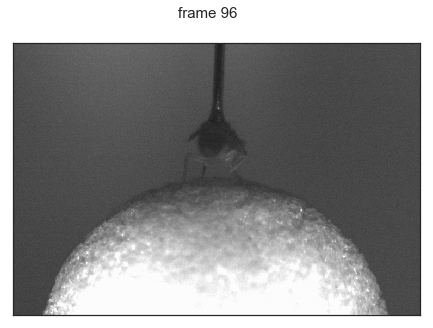

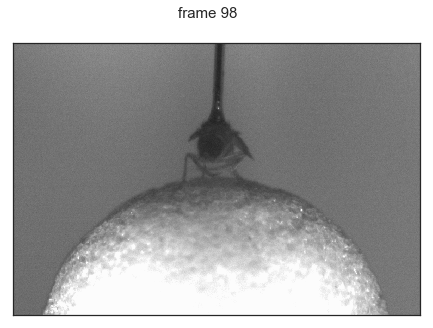

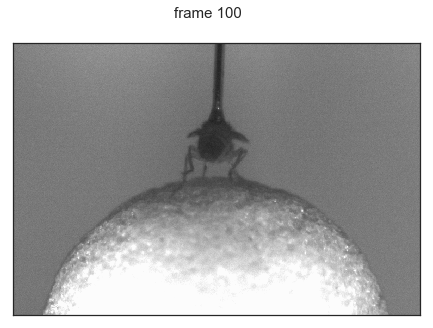

In [112]:
vid = imageio.get_reader(movDir+vidname,  'ffmpeg')
for num in slctframes[:3]:
    num=int(num)
    frameName=str(num)
    image = vid.get_data(num)
    fig,flyplt = plt.subplots(figsize=(10,5))
    fig.suptitle('frame {}'.format(num), fontsize=15)
    flyplt.imshow(image)
    flyplt.invert_xaxis()
    flyplt.get_xaxis().set_visible(False)
    flyplt.get_yaxis().set_visible(False)

In [51]:
try:
    mkdir(analysisDir + 'movieMaterial_fly/')
except:
    print('directory already exists')
try:
    mkdir(analysisDir + 'movieMaterial_fly/frames/')
except:
    print('directory already exists')

vid = imageio.get_reader(movDir+vidname,  'ffmpeg')
for num in slctframes:
    num=int(num)
    frameName=str(num)
    image = vid.get_data(num)
    fig,flyplt = plt.subplots(figsize=(10,5))
    fig.suptitle('frame {}'.format(num), fontsize=15)
    flyplt.imshow(image)
    flyplt.get_xaxis().set_visible(False)
    flyplt.get_yaxis().set_visible(False)
    
    fig.savefig(analysisDir + 'movieMaterial_fly/frames/'+ genotype +'_'+flyIDs[0][0]
                   +'_ballfly_fly'+ flyIDs[fly] +'_frame'+frameName.zfill(5)+'.jpeg', format='jpeg')
    
    plt.close("all")

directory already exists


### Make combined movie: trajectory + fly

In [118]:
try:
    mkdir(analysisDir + 'movieMaterial_fly-trace/')
except:
    print('directory already exists')
try:
    mkdir(analysisDir + 'movieMaterial_fly-trace/frames/')
except:
    print('directory already exists')

tstart = 0
tend =0.5

frameRange = range(tstart*20*60,int(tend*20*60))

# select frames for fly video
trialstart = 96
framerate = 46#38.43
slctframes = np.linspace(int(trialstart+tstart*framerate*60),int(tend*60*framerate),int(20*60*(tend-tstart)))

vid = imageio.get_reader(movDir+vidname,  'ffmpeg')

# color code for time
cNorm  = colors.Normalize(vmin=0, vmax=len(frameRange))
mycmap = colors.LinearSegmentedColormap.from_list('myAccent',_myAccentList, N=256, gamma=1.0)
timeCMap = plt.cm.ScalarMappable(norm=cNorm,cmap=mycmap)

xlimval = (np.min(xPos[frameRange]), np.max(xPos[frameRange]))
ylimval = (np.min(yPos[frameRange]), np.max(yPos[frameRange]))

for frame in frameRange:#int(len(timeTrial)*0.1)):
    frameName = str(frame)
    
    frameFig, framePlt = plt.subplots(1,3, figsize=(15,5), gridspec_kw={'width_ratios':[1.1,1,1.5]})
    
    xpos = xPos[frame]
    ypos = yPos[frame]
    
    #plot past trajectory
    framePlt[0].scatter(xPos[frameRange[0]:frame],yPos[frameRange[0]:frame],s=3,c=np.arange(frameRange[0],frame),
                 cmap=mycmap, vmin=frameRange[0], vmax=frameRange[-1], alpha=0.5)
    
    # plot position
    plotBodyAngle(framePlt[0], xpos, ypos, angleFly[frame],'black', 0.6, 10)
    framePlt[0].plot(xpos,ypos,'.',color=timeCMap.to_rgba(frame),markersize=16)
        
    if(evTrial[frame]>0):
        framePlt[0].plot(xpos,ypos,'.',markersize=15,color='darkred')

    #plot objects
    framePlt[0].scatter(visibleObjectCoords[coneShape, 0], visibleObjectCoords[coneShape, 1], 70, alpha=0.6,
               facecolors='black', edgecolors='none', marker = '^')
    framePlt[0].scatter(visibleObjectCoords[cyliShape, 0], visibleObjectCoords[cyliShape, 1], 70, alpha=0.6,
               facecolors='black', edgecolors='none', marker = 's')
    
    framePlt[0].set_xlim(xlimval[0]-45,xlimval[1]+45)
    framePlt[0].set_ylim(ylimval[0]-70,ylimval[1]+70)
    framePlt[0].set_aspect('equal')
    
    framePlt[0].plot([xlimval[0]-40, xlimval[0]+10],[ylimval[0]-50, ylimval[0]-50], color='k', linewidth=2)
    framePlt[0].text(xlimval[0]-35, ylimval[0]-47, '50 mm', fontsize=14)
    
    framePlt[0].set_title('Raw trajectory',fontsize=14)
    framePlt[0].axis('off')
    
    xpos = xPosTrial[frame]
    ypos = yPosTrial[frame]
    
    # compute distance to each landmark
    dist2cone1 = np.hypot((xPosTrial-coneCoords[0][0]),(yPosTrial-coneCoords[0][1]))
    dist2cone2 = np.hypot((xPosTrial-coneCoords[1][0]),(yPosTrial-coneCoords[1][1]))
    dist2cyli1 = np.hypot((xPosTrial-cyliCoords[0][0]),(yPosTrial-cyliCoords[0][1]))
    dist2cyli2 = np.hypot((xPosTrial-cyliCoords[1][0]),(yPosTrial-cyliCoords[1][1]))

    # compute distance to closest landmark
    dist2closestCone = np.minimum(dist2cone1,dist2cone2)
    dist2closestCyli = np.minimum(dist2cyli1,dist2cyli2)

    entriesCone,exitsCone,visitTCone,entryTimeCone,exitTimeCone = countvisits(dist2closestCone,visitRad)
    entriesCyli,exitsCyli,visitTCyli,entryTimeCyli,exitTimeCyli = countvisits(dist2closestCyli,visitRad)
    
    #plot past trajectory
    framePlt[1].scatter(xPosTrial[frameRange[0]:frame],yPosTrial[frameRange[0]:frame],s=3,c=np.arange(frameRange[0],frame),
                 cmap=mycmap, vmin=frameRange[0], vmax=frameRange[-1], alpha=0.5)
    
    # plot position
    plotBodyAngle(framePlt[1], xpos, ypos, angleFly[frame],'black', 0.6, 6)
    framePlt[1].plot(xpos,ypos,'.',color=timeCMap.to_rgba(frame),markersize=16)

    if(entriesCone[frame]>0):
        framePlt[1].plot(xpos,ypos,'o',markersize=20, color=coneColor)
    
    if(entriesCyli[frame]>0):
        framePlt[1].plot(xpos,ypos,'o',markersize=20, color=cyliColor)
        
    if(evTrial[frame]>0):
        framePlt[1].plot(xpos,ypos,'.',markersize=15,color='darkred')

    framePlt[1].plot(cyliCoords[0][0], cyliCoords[0][1], marker='s', markersize=11, alpha=0.6, color='black')
    framePlt[1].plot(coneCoords[0][0], coneCoords[0][1], marker='^', markersize=14, alpha=0.6, color='black')
    framePlt[1].plot(coneCoords[1][0], coneCoords[1][1], marker='^', markersize=14, alpha=0.6, color='black')
    framePlt[1].plot(cyliCoords[1][0], cyliCoords[1][1], marker='s', markersize=11, alpha=0.6, color='black')

    framePlt[1].set_xlim(0,120)
    framePlt[1].set_ylim(-60,60)
    framePlt[1].set_aspect('equal')
    
    framePlt[1].set_title('Collapsed trajectory', fontsize=14)
    framePlt[1].get_xaxis().set_visible(False)
    framePlt[1].get_yaxis().set_visible(False)
    
    # plot frame from video
    num=int(np.round(slctframes[frame]))
    image = vid.get_data(num)
    framePlt[2].set_title(' fly video: frame {}'.format(num), fontsize=14)
    framePlt[2].imshow(image)
    framePlt[2].invert_xaxis()
    framePlt[2].get_xaxis().set_visible(False)
    framePlt[2].get_yaxis().set_visible(False)
        
    frameFig.savefig(analysisDir + 'movieMaterial_fly-trace/frames/'+ genotype +'_'+flyIDs[0][0]
                       +'_all_fly'+ flyIDs[fly] +'_frame'+frameName.zfill(5)+'.jpeg', format='jpeg')
    
    plt.close("all")

directory already exists
directory already exists


### Make combined movie: trajectory + fly + VR

In [157]:
vidname = 'WTB_x_pBDP-Gal4_m11_twoObjectForest_ex10min.avi'

vrFramesDir = 'vrMovie_46Hz'
vrFramesStem = 'flyvr_movie_46Hz'

In [162]:
try:
    mkdir(analysisDir + 'movieMaterial_all/')
except:
    print('directory already exists')
try:
    mkdir(analysisDir + 'movieMaterial_all/frames2/')
except:
    print('directory already exists')

tstart = 0
tend = 0.5

frameRange = range(tstart*20*60,int(tend*20*60))

# select frames for fly video
vid = imageio.get_reader(movDir+vidname,  'ffmpeg')
trialstart = 98
framerate = 45.5#38.43
slctframes = np.linspace(int(trialstart+tstart*framerate*60),int(tend*60*framerate),int(20*60*(tend-tstart)))

# select frames for VR video
frameratevr = 46
vrslctframes = np.linspace(int(tstart*60*frameratevr),int(tend*60*frameratevr),int(20*60*(tend-tstart)))

# color code for time
cNorm  = colors.Normalize(vmin=0, vmax=len(frameRange))
mycmap = colors.LinearSegmentedColormap.from_list('myAccent',_myAccentList, N=256, gamma=1.0)
timeCMap = plt.cm.ScalarMappable(norm=cNorm,cmap=mycmap)

xlimval = (np.min(xPos[frameRange]), np.max(xPos[frameRange]))
ylimval = (np.min(yPos[frameRange]), np.max(yPos[frameRange]))

import matplotlib.gridspec as gridspec
                                  
for frame in frameRange:#int(len(timeTrial)*0.1)):
    frameName = str(frame)
    
    frameFig = plt.figure(figsize=(14,10))
    gs = gridspec.GridSpec(2,2, width_ratios=[1,1.5])
    
    xpos = xPos[frame]
    ypos = yPos[frame]
    
    #plot past trajectory
    framePlt = frameFig.add_subplot(gs[0,0])
    framePlt.scatter(xPos[frameRange[0]:frame],yPos[frameRange[0]:frame],s=3,c=np.arange(frameRange[0],frame),
                 cmap=mycmap, vmin=frameRange[0], vmax=frameRange[-1], alpha=0.5)
    
    # plot position
    plotBodyAngle(framePlt, xpos, ypos, angleFly[frame],'black', 0.6, 10)
    framePlt.plot(xpos,ypos,'.',color=timeCMap.to_rgba(frame),markersize=16)
        
    if(evTrial[frame]>0):
        framePlt.plot(xpos,ypos,'.',markersize=15,color='darkred')

    #plot objects
    framePlt.scatter(visibleObjectCoords[coneShape, 0], visibleObjectCoords[coneShape, 1], 70, alpha=0.6,
               facecolors='black', edgecolors='none', marker = '^')
    framePlt.scatter(visibleObjectCoords[cyliShape, 0], visibleObjectCoords[cyliShape, 1], 70, alpha=0.6,
               facecolors='black', edgecolors='none', marker = 's')
    
    framePlt.set_xlim(xlimval[0]-45,xlimval[1]+45)
    framePlt.set_ylim(ylimval[0]-70,ylimval[1]+70)
    framePlt.set_aspect('equal')
    
    framePlt.plot([xlimval[0]-40, xlimval[0]+10],[ylimval[0]-50, ylimval[0]-50], color='k', linewidth=2)
    framePlt.text(xlimval[0]-35, ylimval[0]-47, '50 mm', fontsize=14)
    
    framePlt.set_title('Raw trajectory',fontsize=14)
    framePlt.axis('off')
    
    xpos = xPosTrial[frame]
    ypos = yPosTrial[frame]
    
    # compute distance to each landmark
    dist2cone1 = np.hypot((xPosTrial-coneCoords[0][0]),(yPosTrial-coneCoords[0][1]))
    dist2cone2 = np.hypot((xPosTrial-coneCoords[1][0]),(yPosTrial-coneCoords[1][1]))
    dist2cyli1 = np.hypot((xPosTrial-cyliCoords[0][0]),(yPosTrial-cyliCoords[0][1]))
    dist2cyli2 = np.hypot((xPosTrial-cyliCoords[1][0]),(yPosTrial-cyliCoords[1][1]))

    # compute distance to closest landmark
    dist2closestCone = np.minimum(dist2cone1,dist2cone2)
    dist2closestCyli = np.minimum(dist2cyli1,dist2cyli2)

    entriesCone,exitsCone,visitTCone,entryTimeCone,exitTimeCone = countvisits(dist2closestCone,visitRad)
    entriesCyli,exitsCyli,visitTCyli,entryTimeCyli,exitTimeCyli = countvisits(dist2closestCyli,visitRad)
    
    #plot past trajectory
    framePlt = frameFig.add_subplot(gs[1,0])
    framePlt.scatter(xPosTrial[frameRange[0]:frame],yPosTrial[frameRange[0]:frame],s=3,c=np.arange(frameRange[0],frame),
                 cmap=mycmap, vmin=frameRange[0], vmax=frameRange[-1], alpha=0.5)
    
    # plot position
    plotBodyAngle(framePlt, xpos, ypos, angleFly[frame],'black', 0.6, 6)
    framePlt.plot(xpos,ypos,'.',color=timeCMap.to_rgba(frame),markersize=16)

    if(entriesCone[frame]>0):
        framePlt.plot(xpos,ypos,'o',markersize=20, color=coneColor)
    
    if(entriesCyli[frame]>0):
        framePlt.plot(xpos,ypos,'o',markersize=20, color=cyliColor)
        
    if(evTrial[frame]>0):
        framePlt.plot(xpos,ypos,'.',markersize=15,color='darkred')

    framePlt.plot(cyliCoords[0][0], cyliCoords[0][1], marker='s', markersize=11, alpha=0.6, color='black')
    framePlt.plot(coneCoords[0][0], coneCoords[0][1], marker='^', markersize=14, alpha=0.6, color='black')
    framePlt.plot(coneCoords[1][0], coneCoords[1][1], marker='^', markersize=14, alpha=0.6, color='black')
    framePlt.plot(cyliCoords[1][0], cyliCoords[1][1], marker='s', markersize=11, alpha=0.6, color='black')

    framePlt.set_xlim(0,120)
    framePlt.set_ylim(-60,60)
    framePlt.set_aspect('equal')
    
    framePlt.set_title('Collapsed trajectory', fontsize=14)
    framePlt.get_xaxis().set_visible(False)
    framePlt.get_yaxis().set_visible(False)
    
    # plot frame from video
    framePlt = frameFig.add_subplot(gs[1,1])
    num=int(np.round(slctframes[frame]))
    image = vid.get_data(num)
    framePlt.set_title(' Fly video', fontsize=14)#: frame {}'.format(num), fontsize=14)
    framePlt.imshow(image)
    framePlt.invert_xaxis()
    framePlt.get_xaxis().set_visible(False)
    framePlt.get_yaxis().set_visible(False)
    
    # plot frame from video
    framePlt = frameFig.add_subplot(gs[0,1])
    num=int(np.round(vrslctframes[frame]))+1
    image = imageio.imread(movDir+vrFramesDir+sep+vrFramesStem+'_{}.jpg'.format(str(num).zfill(6)))
    framePlt.set_title('Rendered VR scene', fontsize=14)
    framePlt.imshow(image)
    framePlt.get_xaxis().set_visible(False)
    framePlt.get_yaxis().set_visible(False)
    
    frameFig.tight_layout()
    frameFig.savefig(analysisDir + 'movieMaterial_all/frames2/'+ genotype +'_'+flyIDs[0][0]
                       +'_all_fly'+ flyIDs[fly] +'_frame'+frameName.zfill(5)+'.jpeg', format='jpeg')
    
    plt.close("all")


directory already exists
directory already exists


### Make image of cylinder in matplotlib

In [255]:
def cylinder(R, nr, n, tmin, tmax):
    '''
    Returns the unit cylinder that corresponds to the curve r.
    INPUTS:  r - a vector of radii
             n - number of coordinates to return for each element in r

    OUTPUTS: x,y,z - coordinates of points
    '''

    # ensure that r is a column vector
    r = np.linspace(R, R,nr)
    r = np.atleast_2d(r)
    r_rows,r_cols = r.shape
    
    if r_cols > r_rows:
        r = r.T

    # find points along x and y axes
    points  = np.linspace(tmin,tmax,n+1)
    x = np.cos(points)*r
    y = np.sin(points)*r

    # find points along z axis
    rpoints = np.atleast_2d(np.linspace(0,1,len(r)))
    z = np.ones((1,n+1))*rpoints.T
    
    return x,y,z

Text(0.5,0,u'Z')

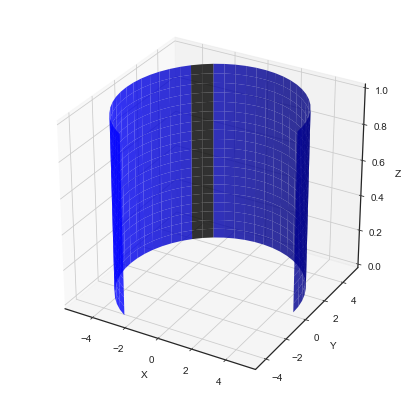

In [261]:
import mpl_toolkits.mplot3d.axes3d as p3

nr = 36
nh = 2

n=20

R = 5
H = 10

tmin = -0.9
tmax = 0.8

gap = 4.19
# get points from cylinder and plot
[X,Y,Z] = cylinder(R, n, nr, 0, gap)#, H, nh, -0.9, 0.8)

# generate face colors
oncol = 'b'
offcol = 'k'
colors = np.empty(X.shape, dtype=str)
stripeLoc = 18
for i in range(X.shape[0]):
    colors[i,:] = np.repeat(oncol, X.shape[1])
    colors[i,stripeLoc:stripeLoc+2] = offcol
    
# make plots
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, color='grey',facecolors=colors, linewidth=0, alpha=0.8, antialiased=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')